# Combine 9 epoch into 1 trial
* This notebook will write methods for converting the data from 9 epochs to 1 trials and label those trials as either language or non languages
* The goal is to be able to convert our data into a two class problems which makes it easy for our classfier to distinguish signals in our data.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict

In [2]:
epoch=mne.read_epochs('C:\\USB Drive\\EpochedEEG\\20131216_1441_epo.fif',preload=True)

Reading C:\USB Drive\EpochedEEG\20131216_1441_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5424 matching events found
Applying baseline correction (mode: mean)
5424 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


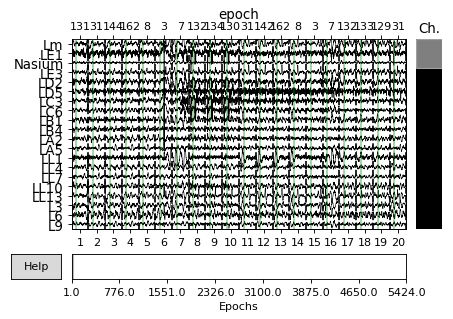

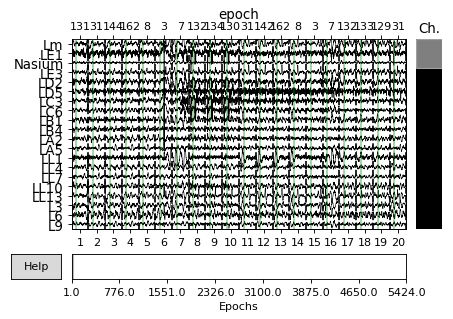

In [4]:
epoch.plot(title="epoch")

In [3]:
epochs=[[]]
i=0
for event in epoch.events[:,-1]:
    if event == 31:
        epochs.append([])
        i=i+1
        epochs[i].append(event)
    else:
        epochs[i].append(event)
        

In [4]:
print(epochs)

[[131], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 144, 162, 8, 3, 7, 131, 134], [31, 142, 162, 8, 3, 7, 131, 133], [31, 144, 162, 8, 3, 7, 131, 134], [31, 142, 162, 8, 3, 7, 132, 133], [31, 144, 162, 8, 3, 7, 131, 134], [31, 144, 162, 8, 3, 131, 7, 134], [31, 144, 162, 8, 3, 131, 7, 134], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 144, 162, 8, 3, 131, 7, 134, 129], [31, 142, 162, 8, 3, 132, 7, 133], [31, 144, 162, 8, 3, 7, 131, 134, 129], [31, 142, 162, 8, 3, 7, 132, 133], [31, 144, 162, 8, 3, 7, 131, 134], [31, 144, 162, 8, 3, 7, 131, 134, 131], [31, 138, 158, 14, 21, 13, 132, 133, 129], [31, 138, 158, 14, 21, 13, 132, 133], [31, 145, 165, 14, 21, 13, 131, 133], [31, 138, 165, 14, 21, 13, 132, 134, 129], [31, 145, 158, 14, 21, 13, 131, 134, 129], [31, 145, 165, 14, 21, 13, 131, 133, 129],

In [64]:
len(epoch.events[:,-1])
print(epoch.events[:,-1][1])
print(epochs[1][0])
print(epoch.events[:,-1][i] == epochs[1][i-1])
epochss=epoch.events[:,-1][for i in range(1)

31
31
True


31

In [5]:
for i in range(1,9):
    if epoch.events[:,-1][i] == epochs[1][i-1]:
        epochss = epoch[epochs[1]]

#### epochss

In [6]:
epochss.events[:,-1]

array([  3, 129, 144, 134, 162, 132,   3,   7, 162])

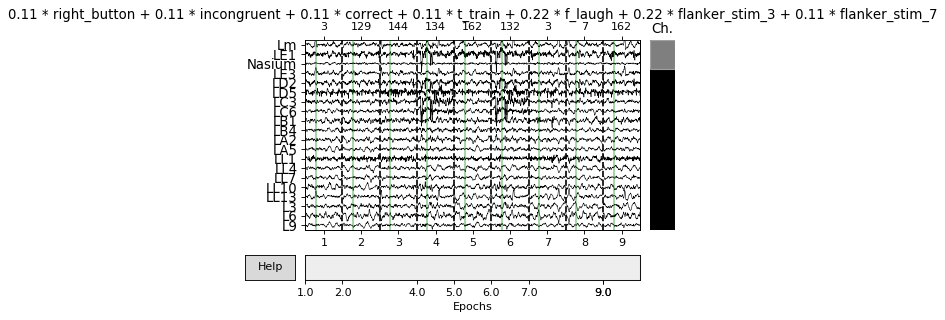

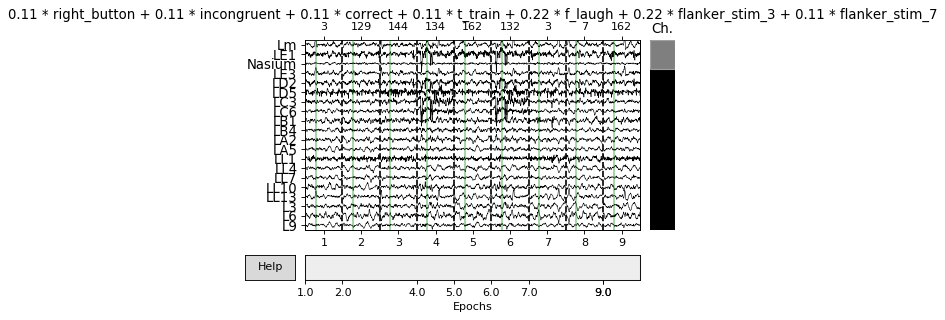

In [7]:
epochss.plot()

In [75]:
temp = defaultdict(list)

for events in epochs:
    if  131 in events:
            temp["congruent"].append(events)
    else:
            temp["incongruent"].append(events)

In [77]:
temp["incongruent"]

[[131],
 [31, 144, 162, 8, 3, 7, 132, 134, 130],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 131, 7, 134],
 [31, 144, 162, 8, 3, 131, 7, 134],
 [31, 144, 162, 8, 3, 131, 7, 134, 129],
 [31, 144, 162, 8, 3, 7, 131, 134, 129],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 7, 131, 134, 131],
 [31, 138, 165, 14, 21, 13, 132, 134, 129],
 [31, 145, 158, 14, 21, 13, 131, 134, 129],
 [31, 138, 165, 14, 21, 132, 13, 134],
 [31, 138, 165, 14, 21, 13, 132, 134],
 [31, 145, 158, 14, 21, 13, 131, 134, 129],
 [31, 138, 165, 14, 21, 13, 132, 134, 129],
 [31, 145, 158, 14, 21, 4, 131, 134],
 [31, 138, 165, 14, 21, 13, 132, 134],
 [31, 138, 165, 14, 21, 13, 132, 134],
 [31, 145, 158, 14, 21, 13, 131, 134, 129],
 [31, 139, 160, 8, 9, 7, 131, 134],
 [31, 139, 160, 8, 9, 7, 131, 134],
 [31, 139, 160, 8, 9, 7, 131, 134],
 [31, 139, 160, 8, 9, 7, 131, 134, 129],
 [31, 139, 160, 8, 9, 7, 132, 134],
 [31, 139, 16

In [28]:
for event in epochs:
    print(event)

[131]
[31, 144, 162, 8, 3, 7, 132, 134, 130]
[31, 142, 162, 8, 3, 7, 132, 133, 129]
[31, 142, 162, 8, 3, 7, 132, 133]
[31, 142, 162, 8, 3, 7, 132, 133, 129]
[31, 144, 162, 8, 3, 7, 131, 134]
[31, 142, 162, 8, 3, 7, 131, 133]
[31, 144, 162, 8, 3, 7, 131, 134]
[31, 142, 162, 8, 3, 7, 132, 133]
[31, 144, 162, 8, 3, 7, 131, 134]
[31, 144, 162, 8, 3, 131, 7, 134]
[31, 144, 162, 8, 3, 131, 7, 134]
[31, 142, 162, 8, 3, 7, 132, 133, 129]
[31, 142, 162, 8, 3, 7, 132, 133, 129]
[31, 142, 162, 8, 3, 7, 132, 133, 129]
[31, 144, 162, 8, 3, 131, 7, 134, 129]
[31, 142, 162, 8, 3, 132, 7, 133]
[31, 144, 162, 8, 3, 7, 131, 134, 129]
[31, 142, 162, 8, 3, 7, 132, 133]
[31, 144, 162, 8, 3, 7, 131, 134]
[31, 144, 162, 8, 3, 7, 131, 134, 131]
[31, 138, 158, 14, 21, 13, 132, 133, 129]
[31, 138, 158, 14, 21, 13, 132, 133]
[31, 145, 165, 14, 21, 13, 131, 133]
[31, 138, 165, 14, 21, 13, 132, 134, 129]
[31, 145, 158, 14, 21, 13, 131, 134, 129]
[31, 145, 165, 14, 21, 13, 131, 133, 129]
[31, 138, 165, 14, 21, 132,

In [35]:
epochs[1][1]

144

In [40]:
for events in epochs:
    for event in events:
        print(event)

131
31
144
162
8
3
7
132
134
130
31
142
162
8
3
7
132
133
129
31
142
162
8
3
7
132
133
31
142
162
8
3
7
132
133
129
31
144
162
8
3
7
131
134
31
142
162
8
3
7
131
133
31
144
162
8
3
7
131
134
31
142
162
8
3
7
132
133
31
144
162
8
3
7
131
134
31
144
162
8
3
131
7
134
31
144
162
8
3
131
7
134
31
142
162
8
3
7
132
133
129
31
142
162
8
3
7
132
133
129
31
142
162
8
3
7
132
133
129
31
144
162
8
3
131
7
134
129
31
142
162
8
3
132
7
133
31
144
162
8
3
7
131
134
129
31
142
162
8
3
7
132
133
31
144
162
8
3
7
131
134
31
144
162
8
3
7
131
134
131
31
138
158
14
21
13
132
133
129
31
138
158
14
21
13
132
133
31
145
165
14
21
13
131
133
31
138
165
14
21
13
132
134
129
31
145
158
14
21
13
131
134
129
31
145
165
14
21
13
131
133
129
31
138
165
14
21
132
13
134
31
138
165
14
21
13
132
134
31
145
158
14
21
13
131
134
129
31
145
165
14
21
13
131
133
31
138
158
14
21
13
132
133
31
138
158
14
21
13
132
133
31
145
165
14
21
13
131
133
129
31
138
165
14
21
13
132
134
129
31
145
158
14
21
4
131
134
31
145
165
14

19
132
134
129
31
143
156
20
24
19
131
134
31
143
163
20
24
19
131
133
31
143
163
20
24
19
131
133
129
31
136
163
20
24
19
132
134
31
136
156
20
24
19
132
133
31
143
156
20
24
19
131
134
31
136
156
20
24
19
132
133
129
131
31
144
164
8
3
7
132
133
31
141
164
8
3
7
132
134
31
141
164
8
3
7
131
134
31
144
164
8
3
7
132
133
31
144
164
8
3
7
132
133
31
144
164
8
3
7
132
133
31
141
164
8
3
7
131
134
31
141
164
8
3
7
131
134
129
31
144
164
8
3
7
132
133
31
141
164
8
3
7
131
134
129
31
144
164
8
3
7
132
133
31
141
164
8
3
7
131
134
31
141
164
8
3
7
131
134
129
31
144
164
8
3
7
132
133
31
144
164
8
3
7
131
133
130
31
144
164
8
3
7
132
133
31
141
164
8
3
7
131
134
31
141
164
8
3
7
132
134
31
144
164
8
3
7
132
133
129
31
141
164
8
3
7
131
134
129
131
31
145
162
2
3
1
131
134
129
31
142
162
2
3
1
132
133
129
31
142
162
2
3
1
132
133
31
145
162
2
3
1
131
134
129
31
145
162
2
3
1
131
134
129
31
142
162
2
3
1
132
133
129
31
145
162
2
3
1
131
134
31
142
162
2
3
1
132
133
31
145
162
2
3
1
132
134
130


In [63]:
print(temp)

defaultdict(<class 'list'>, {'incongruent': [[131], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 144, 162, 8, 3, 7, 132, 134, 130], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133, 129], [31, 142, 162, 8, 3, 7, 132, 133], [31, 142, 162, 8, 3, 7, 132, 133], [31, 142, 162, 8, 3, 7, 132, 133], [31, 142, 162, 8, 3, 7, 132, 133], [31, 142, 162, 8, 3, 7, 132, 133], [31, 142, 162, 8, 3, 7, 132, 133], [31, 142, 162, 8, 3, 7, 132, 133], [31, 142, 162, 8, 3, 7,

In [66]:
epochss = epoch[temp["incongruent"]]

IndexError: arrays used as indices must be of integer (or boolean) type

In [67]:
epochss = epoch[epochs[1]]

In [70]:
epochss.events[:,-1]

array([  3, 129, 144, 134, 162, 132,   3,   7, 162])

In [149]:
temp["congruent"]
events

[31, 142, 161, 2, 9, 1, 131, 134]

In [155]:
epochsss= epoch[epoch.events[:,-1] == temp["congruent"][0]]
temp["congruent"][0]

C:\Users\new user\New folder\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


IndexError: boolean index did not match indexed array along dimension 0; dimension is 5424 but corresponding boolean dimension is 1

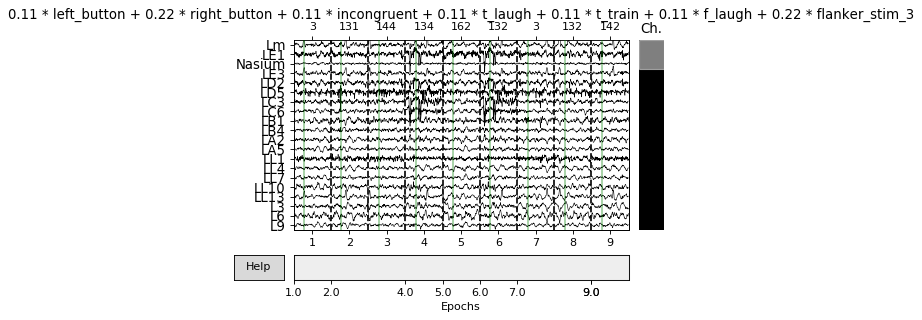

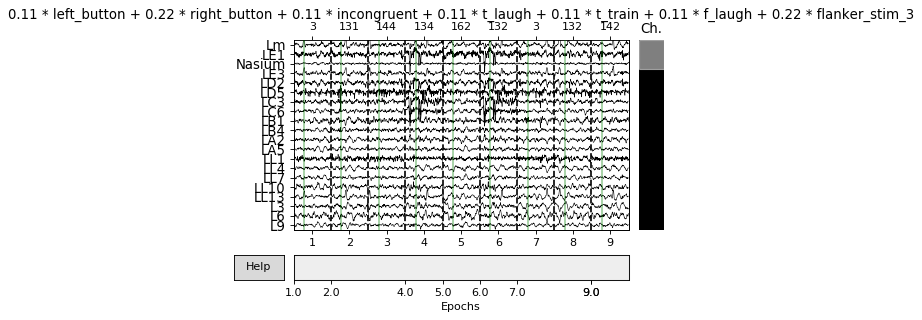

In [116]:
epochsss.plot()

In [114]:
epochs.events[:,-1]

array([  3, 131, 144, 134, 162, 132,   8, 132])

In [157]:
temp["congruent"][3]

[31, 142, 162, 8, 3, 7, 131, 133]

In [178]:
epochsss= epoch[1:10]

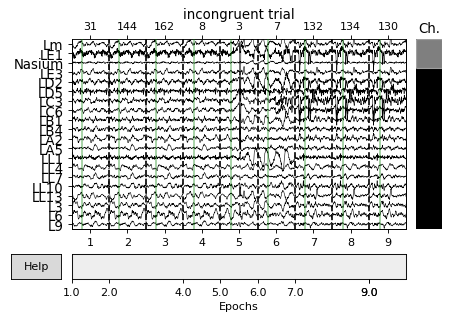

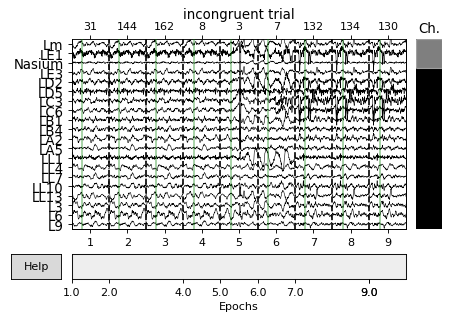

In [180]:
epochsss.plot(title="incongruent trial")

In [105]:
epochsss.events[:,-1]

array([  3,   3, 134,   3, 129,   8,   8, 132])

In [145]:
epochsss= epoch["incongruent"]

In [146]:
epochsss.events[:,1]

array([132,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131,   0,
         0,   0,   0,   0,   0, 132, 131,   0,   0,   0, 131,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 131,   0, 131, 131,   0,   0,   0, 131, 131, 131,   0,   0,
         0, 131,   0,   0, 131, 131, 132, 132, 131, 132, 132,   0, 131,
       131,   0,   0, 131,   0,   0,   0,   0,   0,   0,   0,   0, 131,
       131, 131, 131, 132,   0,   0,   0,   0,   0,   0, 132, 132,   0,
         0,   0,   0,   0, 131, 131, 131, 131,   0,   0,   0,   0, 132,
       132, 132, 131, 132,   0, 132,   0,   0, 131,   0,   0, 131,   0,
         0, 132, 131,   0, 132,   0,   0, 131,   0, 131,   0, 131, 132,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 132,   0,
         0,   0,   0, 132,   0,   0, 131, 132,   0,   0,   0, 131,   0,
         0, 131,   0, 131, 131,   0,   0,   0,   0,   0,   0, 132, 131,
         0,   0, 132,   0,   0, 132, 131,   0, 131,   0,   0, 13

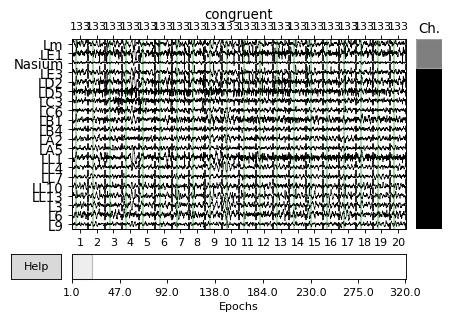

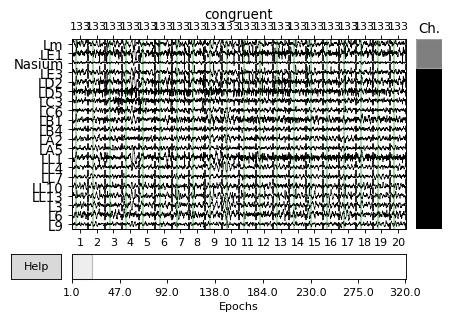

In [156]:
epochsss.plot()

In [164]:
temp["incongruent"]

[[131],
 [31, 144, 162, 8, 3, 7, 132, 134, 130],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 131, 7, 134],
 [31, 144, 162, 8, 3, 131, 7, 134],
 [31, 144, 162, 8, 3, 131, 7, 134, 129],
 [31, 144, 162, 8, 3, 7, 131, 134, 129],
 [31, 144, 162, 8, 3, 7, 131, 134],
 [31, 144, 162, 8, 3, 7, 131, 134, 131],
 [31, 138, 165, 14, 21, 13, 132, 134, 129],
 [31, 145, 158, 14, 21, 13, 131, 134, 129],
 [31, 138, 165, 14, 21, 132, 13, 134],
 [31, 138, 165, 14, 21, 13, 132, 134],
 [31, 145, 158, 14, 21, 13, 131, 134, 129],
 [31, 138, 165, 14, 21, 13, 132, 134, 129],
 [31, 145, 158, 14, 21, 4, 131, 134],
 [31, 138, 165, 14, 21, 13, 132, 134],
 [31, 138, 165, 14, 21, 13, 132, 134],
 [31, 145, 158, 14, 21, 13, 131, 134, 129],
 [31, 139, 160, 8, 9, 7, 131, 134],
 [31, 139, 160, 8, 9, 7, 131, 134],
 [31, 139, 160, 8, 9, 7, 131, 134],
 [31, 139, 160, 8, 9, 7, 131, 134, 129],
 [31, 139, 160, 8, 9, 7, 132, 134],
 [31, 139, 16

In [168]:
epoch.get_data().shape

(5424, 129, 180)

In [172]:
epoch.events[:,-1]

array([131,  31, 144, ...,   1, 131, 134])

In [176]:
epochsssss= epoch[10:19]

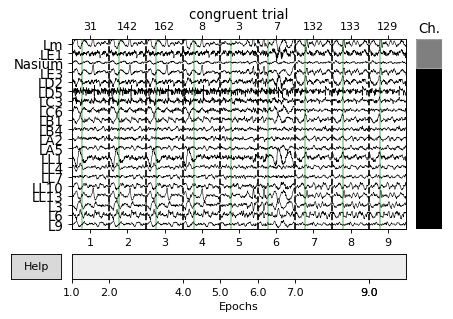

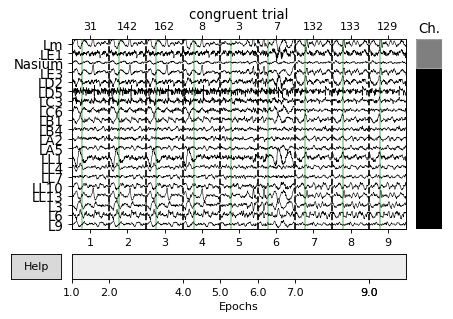

In [181]:
epochsssss.plot(title="congruent trial")

In [182]:
epoch

<EpochsFIF  |   5424 events (all good), -0.199219 - 0.5 sec, baseline [-0.199219, 0], ~961.2 MB, data loaded,
 'congruent': 320
 'correct': 231
 'f_baby': 68
 'f_bell': 48
 'f_bird': 48
 'f_burp': 28
 'f_dog': 64
 'f_drum': 60
 'f_knock': 56
 'f_laugh': 96
 'f_phone': 84
 'f_train': 56
 'f_water': 32
 'flanker_stim_1': 100
 'flanker_stim_10': 80
 'flanker_stim_11': 80
 'flanker_stim_12': 60
 'flanker_stim_2': 100
 'flanker_stim_3': 100
 'flanker_stim_4': 61
 'flanker_stim_5': 60
 'flanker_stim_6': 60
 'flanker_stim_7': 100
 'flanker_stim_8': 100
 'flanker_stim_9': 120
 'incongruent': 320
 'incorrect': 37
 'left_button': 334
 'right_button': 342
 't_baby': 60
 't_bell': 50
 't_bird': 50
 't_burp': 60
 't_dog': 60
 't_drum': 50
 't_knock': 60
 't_laugh': 70
 't_phone': 60
 't_train': 70
 't_water': 50
 'target_stim_13': 59
 'target_stim_14': 60
 'target_stim_15': 100
 'target_stim_16': 80
 'target_stim_17': 80
 'target_stim_18': 80
 'target_stim_19': 100
 'target_stim_20': 100
 'target_s

In [2]:
epochs=epoch[1:4]

NameError: name 'epoch' is not defined

In [184]:
epochs

<EpochsFIF  |   1 events (all good), -0.199219 - 0.5 sec, baseline [-0.199219, 0], ~500 kB, data loaded,
 'trail_start': 1>

In [ ]:
epochs.plot()

In [ ]:
epochs=epoch[epoch.events[:,-1]==162 || ]